In [1]:
#step 1: Import all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

print("All the essential libraries are imported!!!")

All the essential libraries are imported!!!


**1. Data Exploration and Visualization**




#(1) Load the Boston Housing dataset and display the first 5 rows.

In [2]:
import kagglehub
path = kagglehub.dataset_download("jamieleech/boston-housing-dataset")
print("Path to dataset files:", path)
#loading csv file Boston Housing datase
df = pd.read_csv(path + "/housing.csv")

100%|██████████| 11.6k/11.6k [00:00<00:00, 18.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jamieleech/boston-housing-dataset/versions/2


In [3]:
#display the first 5 rows
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#(2) Create a correlation heatmap for all features in the dataset.

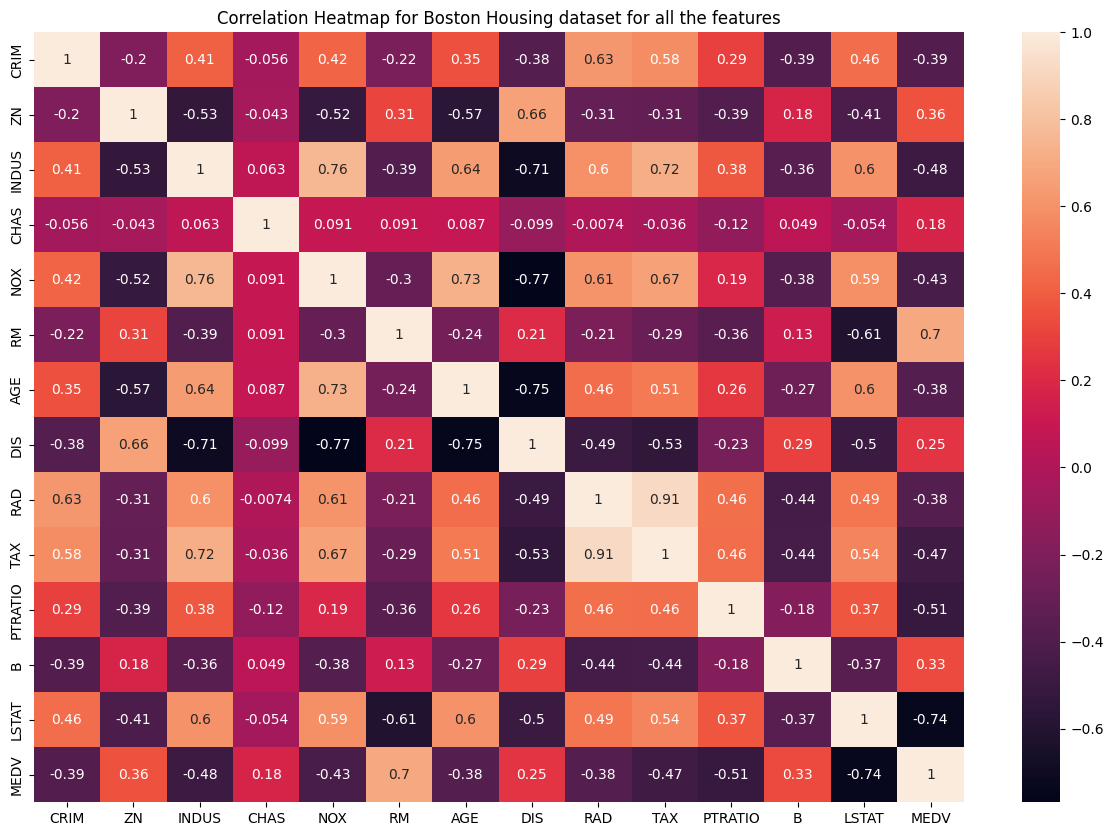

In [4]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,  cbar=True)
plt.title("Correlation Heatmap for Boston Housing dataset for all the features")
plt.show()

#(3) Plot a scatter plot of 'RM' (average number of rooms) vs. 'MEDV' (median value of owner-occupied homes).


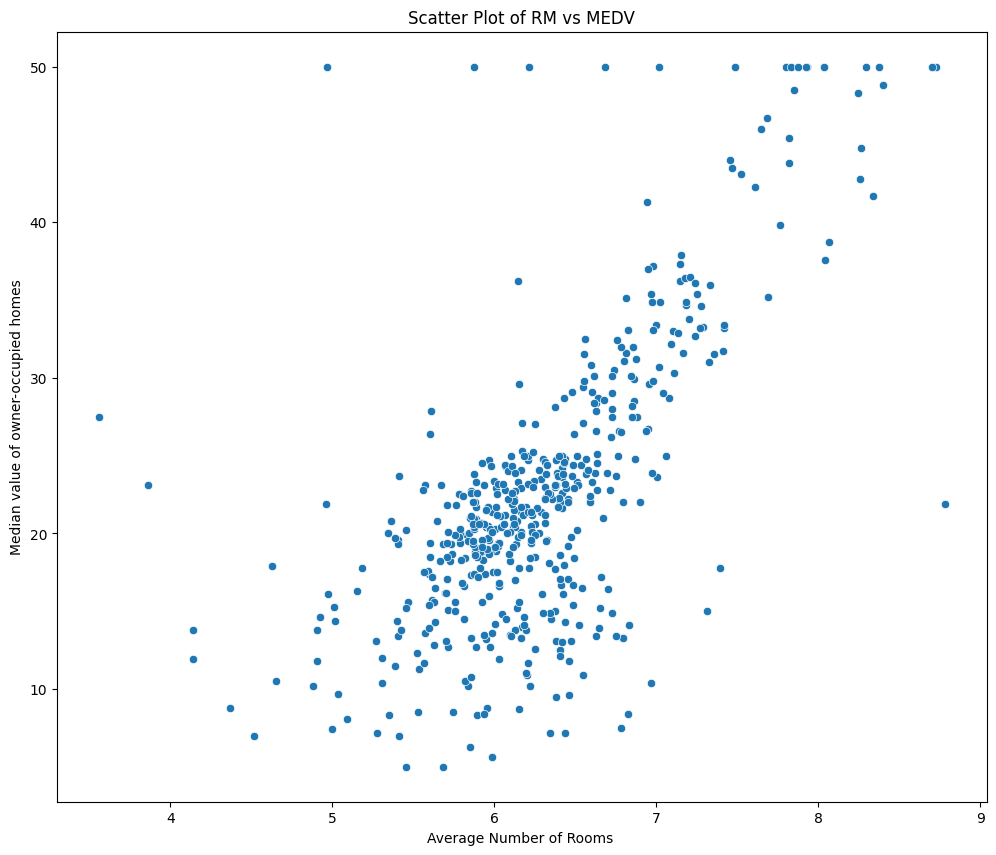

In [5]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='RM', y='MEDV',  marker='o')
plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('Average Number of Rooms ')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

**2. Data Preprocessing and Feature Engineering**

(1) Check for missing values  in the dataset and handle them appropriately

In [6]:
missingValues = df.isnull().sum()
missingCount = 0
for missing in missingValues:
    if missing>0:
        missingCount += missingCount
if missingCount>0:
    print('No of fields which have missing values are ', missing)
else :
    print("No missing values, Hence we don't have to handle them.")

No missing values, Hence we don't have to handle them.


(2) Normalise the numerical features using StandardScaler.

In [7]:
df.dtypes
#All the features are numerical, Hence we can consider all for normalisation.

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64


In [8]:
scaler = StandardScaler()
input_features = df.drop(columns=['MEDV'])  #MEDV is excluded, Since it is a target variable.
scaled_features = scaler.fit_transform(input_features)
normalized_df = pd.DataFrame(scaled_features, columns=input_features.columns)
normalized_df['MEDV'] = df['MEDV']
normalized_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


(3) Create a new feature that represents the ratio of 'LSTAT' (lower status of the population) to 'RM' (average number of rooms).


In [9]:
normalized_df['LSTAT_RM_Ratio'] = df['LSTAT'] / df['RM']
normalized_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LSTAT_RM_Ratio
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,0.757414
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,1.423454
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,0.560891
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,0.420120
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,0.745767


**3. Model Building and Evaluation**

Task 1: Implement a Linear Regression model to predict house prices.
Split the data into training and testing sets (80-20 split)


In [10]:
#Import libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("All the essential libraries are imported!!!")

All the essential libraries are imported!!!


#Split Data to train and test

In [11]:
X = normalized_df.drop(columns=['MEDV'])
y = normalized_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#Train the model on the training data.

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make prediction on the test data

In [13]:
y_pred = model.predict(X_test)

Calculate and print the Mean Squared Error and R-squared score.

In [14]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 22.426106500981525
R-squared Score: 0.7855617978873354


Task 2: Implement a Random Forest Regressor for the same prediction task.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Train the model with at least 100 trees.

In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

Make predictions on the test data.

In [17]:
y_pred_rf = rf_model.predict(X_test)

Calculate and print the Mean Squared Error and R-squared score.

In [18]:
rf_mse= mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", rf_mse)
rf_r2 =  r2_score(y_test, y_pred_rf)
print("R-squared Score:", rf_r2)

Mean Squared Error: 15.0554770490196
R-squared Score: 0.8560396816897775


Plot feature importance for the top 5 most important features.

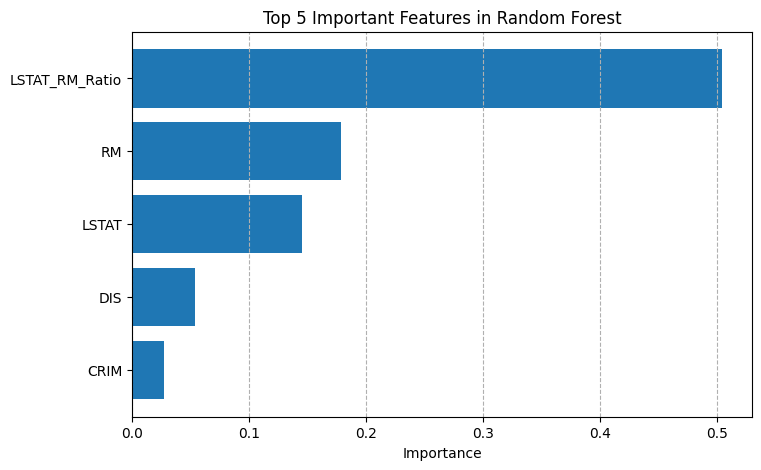

In [19]:
feature_importances = rf_model.feature_importances_
top_indices = np.argsort(feature_importances)[-5:]
top_features = X.columns[top_indices]
plt.figure(figsize=(8, 5))
plt.barh(top_features, feature_importances[top_indices])
plt.xlabel('Importance')
plt.title('Top 5 Important Features in Random Forest')
plt.grid(axis='x', linestyle='--')
plt.show()

**4. Advanced ML Challenge** Task: Implement a simple neural network using any deep learning framework (e.g., TensorFlow, PyTorch) to predict house prices.


Preprocess the data appropriately for neural network input.

In [20]:
#!pip install tensorflow

In [21]:
#import librearies
import tensorflow as tf
print("All the essential libraries are imported!!")

All the essential libraries are imported!!


In [22]:
#Training and Testing input fearures have already under gone preprocessing like
#1. Missing value check and imputation
#2. Standardization of input featues
#3. Convert categorical data into numerical representations
#in the variable normalised_df . So, seperate preprocessing is not required.

Design a network with at least one hidden layer.

In [23]:
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  ])
tf_model.compile(optimizer='adam', loss='mse')
tf_model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

Train the model for a suitable number of epochs.

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = tf_model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=32,
                       validation_split=0.2,
                       callbacks=[early_stopping],
                       verbose=1)
if 'X_test' in locals() and 'y_test' in locals():
    test_loss = tf_model.evaluate(X_test, y_test, verbose=1)
    print("Test Loss:", test_loss)
best_epoch = len(history.history['loss'])
print("Best epoch: Training stopped at epoch ", best_epoch)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 518.5753 - val_loss: 537.8074
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 497.2634 - val_loss: 490.6382
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 434.1993 - val_loss: 435.4014
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 390.9655 - val_loss: 368.3605
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 336.0691 - val_loss: 293.7080
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 263.1310 - val_loss: 216.8168
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 179.0537 - val_loss: 150.2330
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 114.0165 - val_loss: 104.1346
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 76.5284 - val_loss: 79.7765
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 58.9679 - val_loss: 71.9307
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41.9916 - val_loss: 66.9093
Epoch 12/100
11/11 ━━━

Evaluate the model's performance using Mean Squared Error and R-squared score.

In [25]:
y_pred_nn = tf_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print("Neural Network MSE:", mse_nn)
print("Neural Network R²:", r2_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Neural Network MSE: 13.603162640189534
Neural Network R²: 0.8699266972855613
